In [1]:
import pandas as pd
from sklearn import cross_validation 
from sklearn.cross_validation import KFold
%matplotlib inline
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df_heart = pd.read_csv(data_url)
# Changing the NUM column to Diagnosis and assigning hearders to our data
df_heart.columns = ['age','sex','pain','BP','chol','fbs','ecg','maxhr','eiang','eist','slope','vessels','thal','diagnosis']


print('types\r\n ',df_heart.dtypes)
print('\r\nmean, std, minimum and maximum value\r\n ',df_heart.describe())

print('\nchange vessels and thal columns to floats')

types
  age          float64
sex          float64
pain         float64
BP           float64
chol         float64
fbs          float64
ecg          float64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels       object
thal          object
diagnosis      int64
dtype: object

mean, std, minimum and maximum value
                age         sex        pain          BP        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000

In [2]:
# Representation of the data
df_heart.head()

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
df_heart.dtypes

age          float64
sex          float64
pain         float64
BP           float64
chol         float64
fbs          float64
ecg          float64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels       object
thal          object
diagnosis      int64
dtype: object

 We can see clearly that thal and diagnosis do not the same types as the other attributes

# Converting it into float 

In [5]:
df_heart = df_heart.dropna()
df_heart = df_heart.convert_objects(convert_numeric=True)
df_heart.head(5)

C:\Users\Ngabo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [6]:
# Lets check if the problem is fixed now
df_heart.dtypes

age          float64
sex          float64
pain         float64
BP           float64
chol         float64
fbs          float64
ecg          float64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels      float64
thal         float64
diagnosis      int64
dtype: object

# Data Set Information
A number of attributes are listed that possibly influence heart diseases. The presence of heart disease in the patient is an integer valued from 0 (no presence) to 4. 

# Applying Kmeans algorithm

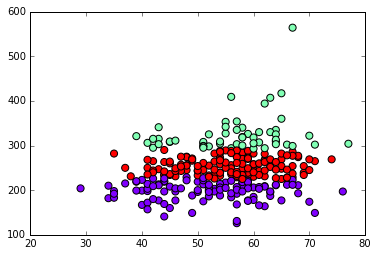

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


x_heart=df_heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

Y_target=df_heart['diagnosis']

#Implementation of the kmean algorithm


est = KMeans(n_clusters=3,random_state=30)
Y_target = est.fit_predict(x_heart)

plt.scatter(x_heart[:,0], x_heart[:,4], c=Y_target, s=50, cmap='rainbow');
plt.show()

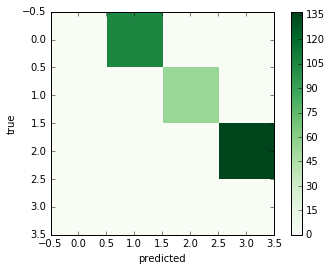

In [27]:
#Confusion matrix to see how the prediction went
labels = [x+1 for x in est.labels_]
plt.imshow(confusion_matrix(Y_target, labels), cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# Second Algorithm

Prediction to which class it belongs
Using prediction algorithm

I am going to try to predict which according to a chosen randomly data which will tell us is the person has a heart deseas 


In [147]:
y = est.predict([56,1,2,120,236,0,0,178,0,0.8,1,0,3,0])
real_class = y[0]
print('the diagnose is ' + str(real_class))

the diagnose is 2


C:\Users\Ngabo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [29]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_heart, Y_target, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

((222, 14), (222L,))


In [30]:
# Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job.
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 14)
clf = clf.fit(X_train, y_train)

In [31]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
printone = X_train[:5,:]
print(printone)

[[ 0.16222623  0.69282032 -1.24320014 -0.07440111 -0.50410559 -0.37990775
   0.96026942  0.58905046 -0.72872113 -0.90469984 -1.00328139 -0.73598007
   1.13708991 -0.79458607]
 [ 1.63450583  0.69282032 -0.20172681  0.49712297  0.12578995 -0.37990775
   0.96026942 -0.1658142  -0.72872113  0.82224224  0.58763624  2.4060887
   1.13708991  0.78039703]
 [ 1.7477581   0.69282032  0.83974651  0.78288501 -1.40122953 -0.37990775
  -1.05086087 -1.09829408  1.37226706  1.34032487  2.17855387 -0.73598007
   1.13708991  2.35538014]
 [ 0.04897396  0.69282032  0.83974651  1.64017113  0.79386097 -0.37990775
   0.96026942 -0.21021801  1.37226706 -0.21392301  0.58763624  0.31137618
   1.13708991  2.35538014]
 [ 0.38873079  0.69282032 -0.20172681 -1.10314445 -0.3323159  -0.37990775
   0.96026942  0.67785807 -0.72872113  1.25397776  0.58763624  0.31137618
   1.13708991  2.35538014]]


In [32]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[ -9.91264015e+00   4.10633193e+00   2.71380368e+00  -1.45213146e+01
   -1.48404782e+02   1.28668884e-01  -7.81775474e+00   2.49997708e+00
   -2.24369624e+00   1.26183129e+01   3.39795904e-01   3.08705213e+00
    5.72170535e+00  -3.46484307e+00]
 [ -5.31189794e+00   8.21266386e-01  -1.26792467e+00   7.36075376e-01
    1.01157727e+02  -1.23522129e+01  -1.23709526e+01   4.76000947e+00
    1.21159597e+00   1.75940814e+00  -2.44653051e+00   6.57676324e+00
    5.21555449e+00  -7.16516091e+00]
 [ -5.28287118e+00   6.29637562e+00   1.55710047e-01   1.61216376e+01
    1.80062360e+01   5.27542426e+00   2.75339604e+01  -3.51002093e+00
   -1.72764611e+01  -1.28506876e+01   1.39316321e+01   7.38208119e+00
    7.41621040e+00  -1.68196266e-01]]
[-71.53863852 -89.88392117  20.84318782]


In [33]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.837837837838


In [36]:
#Prediction using kmean
y = est.predict([67,1,4,160,286,0,2,108,1,1.5,2,3,3,2])
real_class = y[0]
print('This patients has been daignosed with: ' + str(real_class))

This patients has been daignosed with: 2


C:\Users\Ngabo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [39]:
#Prediction using randomforest
from sklearn.ensemble import RandomForestClassifier

real_clf = RandomForestClassifier(n_estimators=60, max_features=1, random_state=0)
real_clf = real_clf.fit(df_heart, Y_target)

y = real_clf.predict([67,1,4,160,286,0,2,108,1,1.5,2,3,3,2])
print('The patient has been daignose with' + str(y[0]) + '.')

The patient has been daignose with2.


C:\Users\Ngabo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [40]:
# First define a helper function to measure the performance of The classifier:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
# And call this method for the training data (display only accuracy)
measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=True)

('Accuracy:0.838', '\n')
Confusion matrix
(array([[24,  0,  2],
       [ 0,  7,  7],
       [ 2,  1, 31]]), '\n')
